<a href="https://colab.research.google.com/github/mgje/PIUMP/blob/master/lab/IEEE754_FliesskommaZahlen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fliesskommazahlen mit Python erforschen

In [28]:
import struct

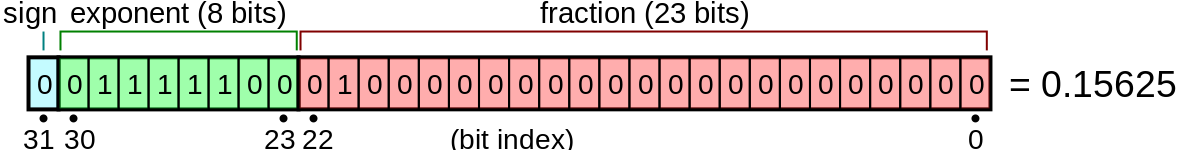

In [29]:
def float_to_bin(num):
    bits, = struct.unpack('!I', struct.pack('!f', num))
    return "{:032b}".format(bits)

out=float_to_bin(0.15625)
print("IEEE754: \t%s"%out)
e = out[1:9]
m = out[9:32]
print("E: \t%s"%e)
print("M: \t%s"%m)

IEEE754: 	00111110001000000000000000000000
E: 	01111100
M: 	01000000000000000000000


In [30]:
def ieee745(N): # ieee-745 bits (max 32 bit)
    a = int(N[0])        # sign,     1 bit
    b = int(N[1:9],2)    # exponent, 8 bits
    c = int("1"+N[9:], 2)# fraction, len(N)-9 bits

    return (-1)**a * c /( 1<<( len(N)-9 - (b-127) ))

V = "0"
E = "01111100"
M = "01000000000000000000000"

Z = V+E+M  
print( ieee745(Z)  )  

0.15625


### Darstellung einer Gleitkommazahl
$ \huge{Z = s \cdot m \cdot 2^{e}}$

Vorzeichen s (1 Bit)
Mantisse m (M Bits)
Basis 2 Gleitkommazahlen nach IEEE 754 ist 
Exponent $e = E-127$ (E Bits)

### Zahlen zwischen 1 und 2 (ohne 2) haben als Exponent 01111111, also 127

- Welches ist die kleinste Flieskommazahl zwischen 1 und 2?
- Welches ist die grösste Fliesskommazahl zwischen 1 und 2
- Wiviele Fliesskommazahlen gibt es zwischen 1 und 2 ? 
- Wie gross ist die Lücke ?

In [31]:
V = "0"
E = "01111111"
M = "00000000000000000000000"
#M = "11111111111111111111111"

Z = V+E+M  
print( ieee745(Z)  )  

1.0


# Spektrum mit matplotlib visualisieren

In [32]:
""" matplotlib """ 
# Libraries
import numpy as np
import time
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt

In [33]:
def showspec(X): #Array as Input
  N = len(X)
  x = np.array(X)
  y = np.array([1.0]*N)

  plt.stem(x,y)
  return plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


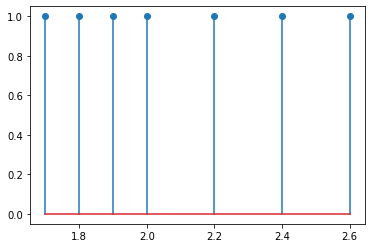

In [34]:
 A = [2,2.2,2.4,2.6,1.9,1.8,1.7]
 showspec(A)

# Welche Fliesskommazahlen sind in der Nähe von 1.0 ?

In [35]:
float_to_bin(1.0)

'00111111100000000000000000000000'

In [36]:
Z = []

Z.append(ieee745('00111111100000000000000000000000'))
Z.append(ieee745('00111111100000000000000000000001'))
Z.append(ieee745('00111111100000000000000000000010'))
Z.append(ieee745('00111111100000000000000000000011'))
Z.append(ieee745('00111111100000000000000000000100'))
Z.append(ieee745('00111111100000000000000000000101'))
Z.append(ieee745('00111111100000000000000000000110'))
Z.append(ieee745('00111111100000000000000000000111'))


In [37]:
Z

[1.0,
 1.0000001192092896,
 1.000000238418579,
 1.0000003576278687,
 1.0000004768371582,
 1.0000005960464478,
 1.0000007152557373,
 1.0000008344650269]

In [38]:
Z[1]-Z[0]

1.1920928955078125e-07

In [ ]:
Z[2]-Z[1]

1.1920928955078125e-07

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


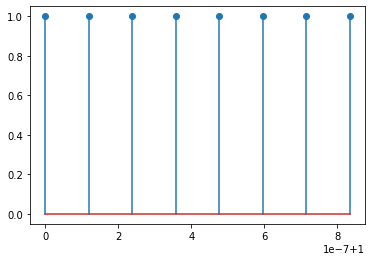

In [39]:
showspec(Z)

In [45]:
W = []

W.append(ieee745('00111111011111111111111111111111'))
W.append(ieee745('00111111011111111111111111111110'))
W.append(ieee745('00111111011111111111111111111101'))
W.append(ieee745('00111111011111111111111111111100'))
W.append(ieee745('00111111011111111111111111111011'))
W.append(ieee745('00111111011111111111111111111010'))
W.append(ieee745('00111111011111111111111111111001'))
W.append(ieee745('00111111011111111111111111111000'))



In [44]:
W

[0.9999999403953552,
 1.0000001192092896,
 1.000000238418579,
 1.0000003576278687,
 1.0000004768371582,
 1.0000005960464478,
 1.0000007152557373,
 1.0000008344650269]

In [46]:
W[0]-W[1]

5.960464477539063e-08

In [47]:
W[1]-W[2]

5.960464477539063e-08

In [48]:
W[2]-W[3]

5.960464477539063e-08

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


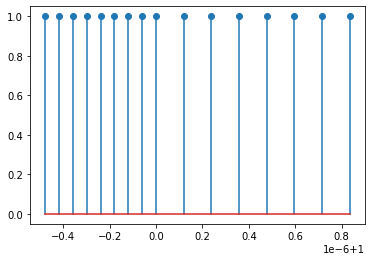

In [49]:
S = Z+W
showspec(S)

In [50]:
S

[1.0,
 1.0000001192092896,
 1.000000238418579,
 1.0000003576278687,
 1.0000004768371582,
 1.0000005960464478,
 1.0000007152557373,
 1.0000008344650269,
 0.9999999403953552,
 0.9999998807907104,
 0.9999998211860657,
 0.9999997615814209,
 0.9999997019767761,
 0.9999996423721313,
 0.9999995827674866,
 0.9999995231628418]